In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def random_vote(votes, N, voter,vote_credits):
    credits_left = vote_credits
    delegates = []
    while credits_left > 0:
        i = np.random.randint(0, N)
        while i == voter or i in delegates:
            i = np.random.randint(0, N)
        delegates.append(i)
        credits_given = np.floor(np.sqrt(credits_left))
        votes[i] += credits_given
        credits_left -= credits_given

def colluded_vote(votes, voter, leader,vote_credits):
    credits_left = vote_credits
    delegates = []
    i=1
    while credits_left > 0:
        credits_given = np.floor(np.sqrt(credits_left))
        credits_left -= credits_given
        if voter == leader or leader in delegates:
            # Asserting that leader is always is 0 and colluding actors are next in the array stack
            complete = False
            while not complete:
                if i != voter and i != leader and i not in delegates:
                    votes[leader+i] += credits_given
                    delegates.append(i)
                    complete = True
                i+=1
        else:
            votes[leader] += credits_given
            delegates.append(leader)

def get_optimal_k(N, rounds, vote_credits):
    # N = 100
    # rounds = 10000


    # Initialize votes array with zeros
    votes = np.zeros(N, dtype=np.float64)
    winners = np.zeros(rounds, dtype=np.int64)  # Fix the size of the winners array and use int64 for indices
    cost_of_collusion = np.zeros(N, dtype=np.float64)
    cost_of_fair_win = np.zeros(N, dtype=np.float64)
    leader = 0 # Index pos of leader
    for K in range(0, N):
        for index in range(rounds):
            for voter in range(N):
                if voter < K:
                    colluded_vote(votes, voter, leader,vote_credits)
                else:
                    random_vote(votes,N, voter,vote_credits)
            winners[index] = np.argmax(votes)
            # print("Round", index, "Winner:", winners[index], "score:", votes[int(winners[index])])
            votes = np.zeros_like(votes)  # Reset votes after each round
        fair_winners = winners[winners >= K]
        colluding_winners = winners[winners < K]
        cost_of_collusion[K] = np.inf if len(colluding_winners) == 0  else rounds * (K+1) / len(colluding_winners)
        fair_player_num = N-K
        cost_of_fair_win[K] = np.inf if len(fair_winners) == 0 else fair_player_num * rounds / len(fair_winners)
        # cost_of_fair_win[K]=  np.inf if len(fair_winners) == 0 else rounds / len(fair_winners)
        # print("colluding_winners", len(colluding_winners), "fair_winners", len(fair_winners), "cost of collusion:", cost_of_collusion[K], "cost of fair win:", cost_of_fair_win[K])
        winners = np.zeros_like(winners)
    votes /= rounds # Normalize

    data = {
        'Cost of collusion': cost_of_collusion,
        'Cost of fair win': cost_of_fair_win

    }

    df = pd.DataFrame(data)


    return df




# Separate votes into fair and colluded

# Convert votes to a pandas DataFrame for better handling
# colluded_votes_df = pd.DataFrame(colluded_votes, columns=['Votes'])

# Print the votes to see the result
# print(colluded_votes)

# # Plot the votes
# colluded_votes_df.plot(kind='bar', legend=False)
# plt.xlabel('Candidate')
# plt.ylabel('Votes')
# plt.title('Votes Distribution')
# plt.show()

# # Plot histograms for fair and colluded voters
# plt.figure(figsize=(12, 6))

In [169]:

df = get_optimal_k(100, 1000,1)
min_cost_of_collusion_index = df['Cost of collusion'].idxmin()
min_cost_of_collusion = df['Cost of collusion'].min()
print("min_cost_of_collusion:", min_cost_of_collusion, "at K =", min_cost_of_collusion_index)

min_cost_of_collusion: 6.802721088435374 at K = 5


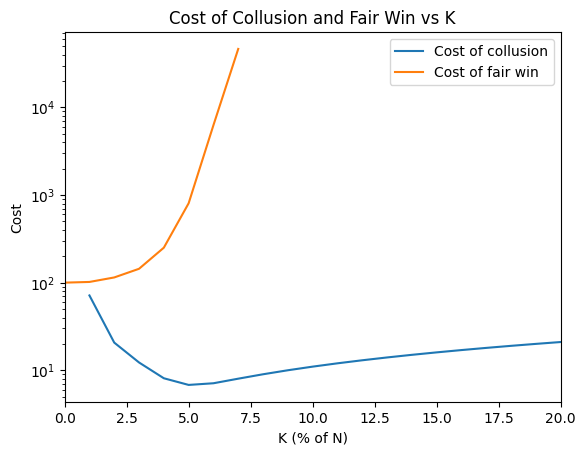

In [170]:
# Plot the DataFrame against its index
df.plot()
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('K (% of N)')
plt.ylabel('Cost')
plt.xlim(0, 20)
plt.title('Cost of Collusion and Fair Win vs K')
plt.legend()
plt.show()

print("Probability of fair player winning:", probability_of_fair_player_win)